In [44]:
import os
import json

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [45]:
records = []
for p in os.listdir("./log/"):
    with open(f"./log/{p}", "r") as f:
        d = json.load(f)
        records.append(pd.json_normalize(d))

In [46]:
df = pd.concat(records).reset_index(drop=True)
df = (
    df[
        (df["args.sampling"] == "uplift-based-pointwise")
        & (df["args.batch_size"] == 1000)
    ]
    .drop_duplicates()
    .sort_values(by="args.alpha")
)

<Axes: xlabel='args.alpha'>

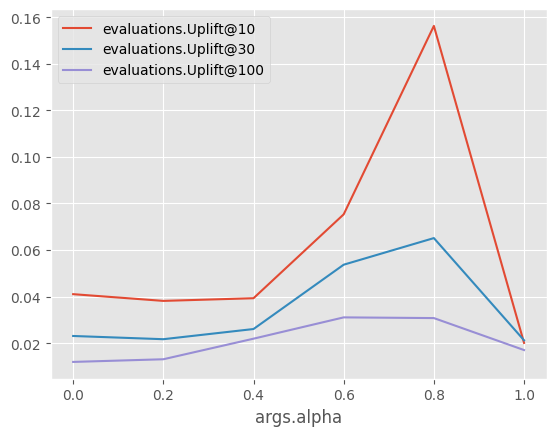

In [47]:
df.plot(
    "args.alpha",
    [
        "evaluations.Uplift@10",
        "evaluations.Uplift@30",
        "evaluations.Uplift@100",
    ],
)

<Axes: xlabel='args.alpha'>

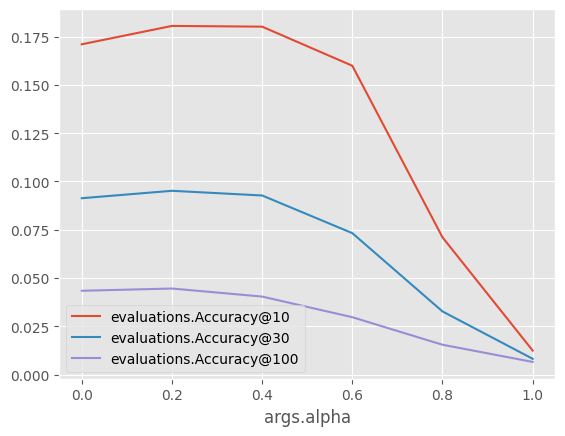

In [48]:
df.plot(
    "args.alpha",
    [
        "evaluations.Accuracy@10",
        "evaluations.Accuracy@30",
        "evaluations.Accuracy@100",
    ],
)